In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import tensorflow as tf 
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import datetime
from alexnet import AlexNet

In [3]:
# Set the GPU growth in order to avoid the sudden stop of the runtime. 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Give the global constants.Please notify BATCH_SIZE for model.fit() and Batch_Size for 
# model.evaluate() and model.predict()
EPOCHS = 6
BATCH_SIZE = 32
Batch_Size = 1
image_width = 227
image_height = 227
channels = 3
num_classes = 6

In [5]:
# Calls the alexnet model in alexnet.py
model = AlexNet((image_width,image_height,channels), num_classes)

In [6]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# It will output the AlexNet model after executing the command 
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       884

In [8]:
train_dir = '/home/mike/Documents/Six_Classification_AlexNet/seg_train/seg_train'
test_dir = '/home/mike/Documents/Six_Classification_AlexNet/seg_test/seg_test'
predict_dir = '/home/mike/Documents/Six_Classification_AlexNet/seg_pred/'

In [9]:
# keras.preprocessing.image.ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1)

# keras.preprocessing.image.DirectoryIterator
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(image_width,image_height),
                                                    color_mode='rgb',
                                                    batch_size=BATCH_SIZE,
                                                    seed=123,
                                                    shuffle=True, 
                                                    class_mode='categorical')

train_num = train_generator.samples

Found 14034 images belonging to 6 classes.


In [10]:
# Start Tensorboard --logdir logs/fit
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

In [11]:
# Set verbose=1 (or verbose=0) for visibale (or invisible) training procedure. 
model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num//BATCH_SIZE,
          callbacks=callback_list,
          verbose=1)

Epoch 1/6
438/438 [==============================] - 101s 231ms/step - loss: 1.9720 - accuracy: 0.1752
Epoch 2/6
438/438 [==============================] - 103s 234ms/step - loss: 1.7914 - accuracy: 0.1764
Epoch 3/6
438/438 [==============================] - 104s 236ms/step - loss: 1.7912 - accuracy: 0.1761
Epoch 4/6
438/438 [==============================] - 102s 232ms/step - loss: 1.7912 - accuracy: 0.1786
Epoch 5/6
438/438 [==============================] - 101s 230ms/step - loss: 1.7911 - accuracy: 0.1787
Epoch 6/6
438/438 [==============================] - 101s 230ms/step - loss: 1.7910 - accuracy: 0.1793


In [12]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 5358), started 0:28:41 ago. (Use '!kill 5358' to kill it.)

In [13]:
# It is the test generator as similar as the above. 
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(image_width,image_height), 
                                                  class_mode='categorical')

test_num = test_generator.samples

Found 3000 images belonging to 6 classes.


In [14]:
# Evalute the trained model and return both the loss and the test accuracy. 
test_num = test_generator.samples
preds = model.evaluate(test_generator,
                       verbose=1,
                       batch_size=Batch_Size,
                       steps=test_num//Batch_Size)

print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

3000/3000 [==============================] - 81s 27ms/step - loss: 1.7905 - accuracy: 0.1751
Loss = 1.7904634475708008
Test Accuracy = 0.1751190572977066


In [15]:
# Give the implicit steps=7301 for selecting the specific image number.
predict_datagen = ImageDataGenerator(rescale=1.0/255)

predict_generator = predict_datagen.flow_from_directory(predict_dir, 
                                                        target_size=(image_width,image_height),
                                                        batch_size=Batch_Size,
                                                        class_mode='categorical')

predict_num = predict_generator.samples

Found 7301 images belonging to 1 classes.


In [16]:
# Make the prediction for any one of the predicted images 
predictions = model.predict(predict_generator,
                            verbose=1,
                            batch_size=Batch_Size,
                            steps=predict_num//Batch_Size)

7301/7301 [==============================] - 19s 3ms/step


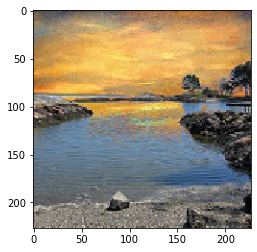

In [17]:
# Plot the discriptive diagram 
imshow(predict_generator[5800][0][0])
plt.imsave("predicted1.png",predict_generator[5800][0][0])

In [18]:
predictions[5800]

array([0.15871355, 0.16445243, 0.17110325, 0.17570409, 0.16061683,
       0.16940992], dtype=float32)

In [19]:
print(predictions[5800])

[0.15871355 0.16445243 0.17110325 0.17570409 0.16061683 0.16940992]


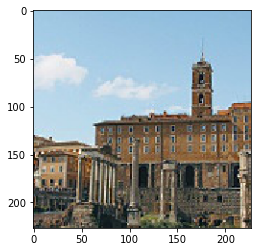

In [20]:
imshow(predict_generator[4800][0][0])

In [21]:
predictions[4800]

array([0.15871355, 0.16445243, 0.17110325, 0.17570409, 0.16061683,
       0.16940992], dtype=float32)

In [22]:
import os 

def get_category(predicted_output):
    return os.listdir(train_dir)[np.argmax(predicted_output)] 

In [23]:
print(get_category(predictions[512]))

buildings


Text(0.5, 1.0, 'buildings')

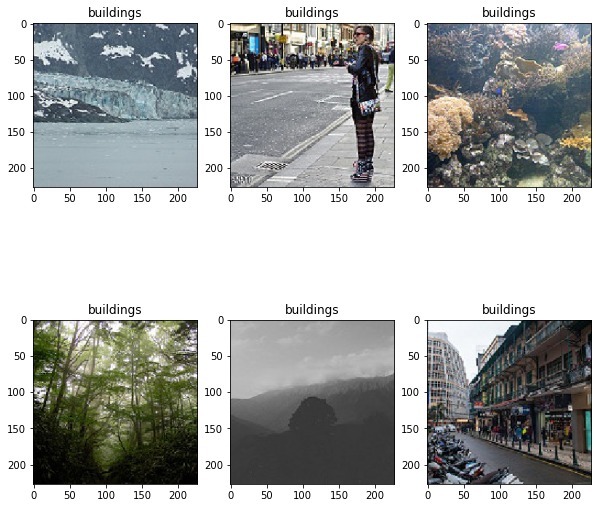

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))

axs[0][0].imshow(predict_generator[1002][0][0])
axs[0][0].set_title(get_category(predictions[1002]))

axs[0][1].imshow(predict_generator[22][0][0])
axs[0][1].set_title(get_category(predictions[22]))

axs[0][2].imshow(predict_generator[1300][0][0])
axs[0][2].set_title(get_category(predictions[1300]))

axs[1][0].imshow(predict_generator[3300][0][0])
axs[1][0].set_title(get_category(predictions[3300]))

axs[1][1].imshow(predict_generator[7002][0][0])
axs[1][1].set_title(get_category(predictions[7002]))

axs[1][2].imshow(predict_generator[512][0][0])
axs[1][2].set_title(get_category(predictions[512]))